In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from scipy.spatial import KDTree
import time
import plotly.graph_objects as go

k_neighbors = 3

In [ ]:
pip install mayavi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 20.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.7 MB/s eta 0:00:00
  Using cached vtk-9.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (92.1 MB)
  Created wheel for mayavi: filename=mayavi-4.8.2-cp310-cp310-linux_x86_64.whl size=16763893 sha256=00e0fa31607759c31816cb1db6c9869650804cf3400ad754257940694dee4003
  Stored in directory: /root/.cache/pip/wheels/60/52/8c/d16aeced951729965d3a787b59424bfc235372fafd1130c56e
Successfully buil

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mayavi import mlab

/usr/local/lib/python3.10/dist-packages/traits/etsconfig/etsconfig.py:425: UserWarning:

Environment variable "HOME" not set, setting home directory to /tmp



In [ ]:
iris = load_iris()
X = iris.data[:, :3]  # Truncate to 3 features
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def brute_force_knn(train_X, train_y, test_X, k):
    predictions = []
    for test_point in test_X:
        distances = np.sqrt(np.sum((train_X - test_point)**2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = train_y[nearest_indices]
        most_common = Counter(nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    return np.array(predictions)

In [ ]:
def kd_tree_knn(train_X, train_y, test_X, k):
    kdtree = KDTree(train_X)
    _, indices = kdtree.query(test_X, k=k)
    knn_labels = train_y[indices]
    predictions = [Counter(labels).most_common(1)[0][0] for labels in knn_labels]
    return np.array(predictions),kdtree

In [ ]:
start_time = time.time()
brute_force_predictions = brute_force_knn(X_train, y_train, X_test, k_neighbors)
brute_force_time = time.time() - start_time
accuracy1 = accuracy_score(y_test,brute_force_predictions)
print(accuracy1,brute_force_time)

0.9666666666666667 0.00776362419128418


In [ ]:
start_time = time.time()
kd_tree_predictions,kdtree = kd_tree_knn(X_train, y_train, X_test, k_neighbors)
kd_tree_time = time.time() - start_time
accuracy2 = accuracy_score(y_test, kd_tree_predictions)
print(accuracy2,kd_tree_time)

0.9666666666666667 0.0051004886627197266


In [ ]:
from sklearn.tree import plot_tree

In [ ]:
!pip install PyQt5==5.15.7 pyqtwebengine==5.15.6 traitsui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.4/230.4 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: PyQt5
    Found existing installation: PyQt5 5.15.10
    Uninstalling PyQt5-5.15.10:
      Successfully uninstalled PyQt5-5.15.10


In [ ]:
!pip install PyQt5==5.15.7 pyqtwebengine==5.15.6 traitsui
!pip install vtk

In [ ]:
from mayavi import mlab

# Visualization function for KD-Tree structure
def plot_kd_tree(node, xmin, xmax, ymin, ymax, zmin, zmax, depth):
    if node is None:
        return

    dim = depth % 3
    if dim == 0:
        mlab.plot3d([node.split, node.split], [ymin, ymax], [zmin, zmax], color=(1, 0, 0), tube_radius=0.01)
        plot_kd_tree(node.less, xmin, node.split, ymin, ymax, zmin, zmax, depth + 1)
        plot_kd_tree(node.greater, node.split, xmax, ymin, ymax, zmin, zmax, depth + 1)
    elif dim == 1:
        mlab.plot3d([xmin, xmax], [node.split, node.split], [zmin, zmax], color=(0, 1, 0), tube_radius=0.01)
        plot_kd_tree(node.less, xmin, xmax, ymin, node.split, zmin, zmax, depth + 1)
        plot_kd_tree(node.greater, xmin, xmax, node.split, ymax, zmin, zmax, depth + 1)
    else:
        mlab.plot3d([xmin, xmax], [ymin, ymax], [node.split, node.split], color=(0, 0, 1), tube_radius=0.01)
        plot_kd_tree(node.less, xmin, xmax, ymin, ymax, zmin, node.split, depth + 1)
        plot_kd_tree(node.greater, xmin, xmax, ymin, ymax, node.split, zmax, depth + 1)

# Define plot limits
xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])
zmin, zmax = np.min(X[:, 2]), np.max(X[:, 2])

# Create the Mayavi figure
mlab.figure(size=(800, 600))
mlab.points3d(X[:, 0], X[:, 1], X[:, 2], color=(0, 0, 1), mode='point')

# Overlay KD-Tree structure
plot_kd_tree(kdtree.tree, xmin, xmax, ymin, ymax, zmin, zmax, 0)

# Set plot labels
mlab.xlabel('Feature 1')
mlab.ylabel('Feature 2')
mlab.zlabel('Feature 3')

# Show the Mayavi plot
mlab.show()


ImportError: Could not import backend for traitsui.  Make sure you
        have a suitable UI toolkit like PyQt/PySide or wxPython
        installed.

In [ ]:
brute_force_accuracy = accuracy_score(y_test, brute_force_predictions)
kd_tree_accuracy = accuracy_score(y_test, kd_tree_predictions)

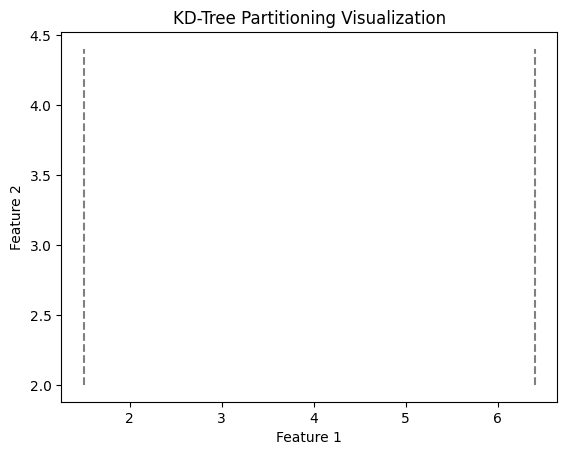

In [ ]:
# Iterate through the split values of nodes at the first level
for node in [kdtree.tree.less, kdtree.tree.greater]:
    if node is not None:
        plt.plot([node.split, node.split], [np.min(X[:, 1]), np.max(X[:, 1])], color='gray', linestyle='--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KD-Tree Partitioning Visualization')
plt.show()

In [ ]:
scatter = go.Scatter3d(
    x=X_train[:, 0], y=X_train[:, 1], z=X_train[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=y_train,
        colorscale='Viridis',
        opacity=0.8
    )
)

# Layout for the 3D scatter plot
layout = go.Layout(
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3'
    )
)

# Create the figure and add the scatter plot
fig = go.Figure(data=[scatter], layout=layout)

# Show the plot
fig.show()


In [ ]:
def plot_kd_partition_3d(ax, node, xmin, xmax, ymin, ymax, zmin, zmax, depth):
    if node is None:
        return

    # Check if the current node is a leaf node and return if it is.
    if isinstance(node, KDTree.leafnode):
        return

    dim = depth % 3
    if hasattr(node, 'split'):
        if dim == 0:
            ax.plot([node.split, node.split], [ymin, ymax], [zmin, zmax], color='red')
        elif dim == 1:
            ax.plot([xmin, xmax], [node.split, node.split], [zmin, zmax], color='green')
        else:
            ax.plot([xmin, xmax], [ymin, ymax], [node.split, node.split], color='blue')

    if dim == 0:
        plot_kd_partition_3d(ax, node.less, xmin, node.split, ymin, ymax, zmin, zmax, depth + 1)
        plot_kd_partition_3d(ax, node.greater, node.split, xmax, ymin, ymax, zmin, zmax, depth + 1)
    elif dim == 1:
        plot_kd_partition_3d(ax, node.less, xmin, xmax, ymin, node.split, zmin, zmax, depth + 1)
        plot_kd_partition_3d(ax, node.greater, xmin, xmax, node.split, ymax, zmin, zmax, depth + 1)
    else:
        plot_kd_partition_3d(ax, node.less, xmin, xmax, ymin, ymax, zmin, node.split, depth + 1)
        plot_kd_partition_3d(ax, node.greater, xmin, xmax, ymin, ymax, node.split, zmax, depth + 1)

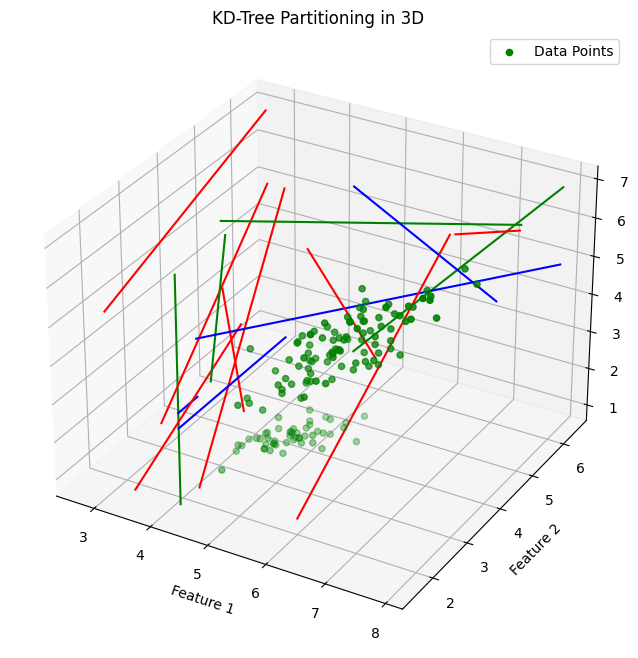

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='green', marker='o', label='Data Points')

# Define plot limits
xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])
zmin, zmax = np.min(X[:, 2]), np.max(X[:, 2])

# Overlay KD-Tree partitioning
plot_kd_partition_3d(ax, kdtree.tree, xmin, xmax, ymin, ymax, zmin, zmax, 0)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KD-Tree Partitioning in 3D')
ax.legend()
plt.show()

In [ ]:
node = kdtree.tree

In [ ]:
mlab.figure(size=(800, 600))
mlab.points3d(X[:, 0], X[:, 1], X[:, 2], color=(0, 0, 1), mode='point')

# Visualization function for partitioning
def plot_kd_partition(node, xmin, xmax, ymin, ymax, zmin, zmax, depth):
    if node is None:
        return

    dim = depth % 3
    if dim == 0:
        mlab.plot3d([node.split, node.split], [ymin, ymax], [zmin, zmax], color=(1, 0, 0))
        plot_kd_partition(node.less, xmin, node.split, ymin, ymax, zmin, zmax, depth + 1)
        plot_kd_partition(node.greater, node.split, xmax, ymin, ymax, zmin, zmax, depth + 1)
    elif dim == 1:
        mlab.plot3d([xmin, xmax], [node.split, node.split], [zmin, zmax], color=(0, 1, 0))
        plot_kd_partition(node.less, xmin, xmax, ymin, node.split, zmin, zmax, depth + 1)
        plot_kd_partition(node.greater, xmin, xmax, node.split, ymax, zmin, zmax, depth + 1)
    else:
        mlab.plot3d([xmin, xmax], [ymin, ymax], [node.split, node.split], color=(0, 0, 1))
        plot_kd_partition(node.less, xmin, xmax, ymin, ymax, zmin, node.split, depth + 1)
        plot_kd_partition(node.greater, xmin, xmax, ymin, ymax, node.split, zmax, depth + 1)

# Define plot limits
xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])
zmin, zmax = np.min(X[:, 2]), np.max(X[:, 2])

# Overlay KD-Tree partitioning
plot_kd_partition(kdtree.tree, xmin, xmax, ymin, ymax, zmin, zmax, 0)

# Set plot labels
mlab.xlabel('Feature 1')
mlab.ylabel('Feature 2')
mlab.zlabel('Feature 3')

mlab.show()

ImportError: Could not import backend for traitsui.  Make sure you
        have a suitable UI toolkit like PyQt/PySide or wxPython
        installed.